# Linear Regression Model

For Linear Regression like $Y = Xw$, we have $Y$ is $(n,)$ vec, and $w$ is $(m,)$ vec, and $X$ is $n \times m$ matrix

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [200]:
n = 1000
m = 100
X = np.random.randn(n,m)
Y = X.dot(np.linspace(1, 2, m))+np.random.randn(n)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X.shape

(1000, 101)

### 1) firstly we do OLS
Firstly we need to minimize $f = ||Y-Xw||^2 = (Y-Xw)^T(Y-Xw)$

Then $df = (-Xdw)^T(Y-Xw) + (Y-Xw)^T(-Xdw)$

Then $df = tr(df) = tr((-Xdw)^T(Y-Xw)) + tr((Y-Xw)^T(-Xdw))$\\
$ = -tr((Y-Xw)^T)Xdw = tr((X^T(Xw-Y))^T dw)$



Comparing with $df = tr(\frac{df}{dw}^Tdw)$, we have $\frac{df}{dw} = X^T(Xw-Y)$

Let $\frac{df}{dw} = 0$, we havew $w = (X^TX)^{-1}X^TY$

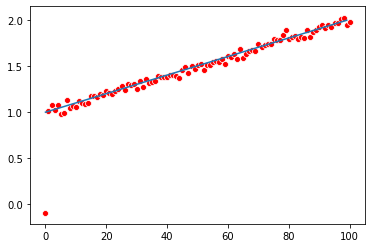

In [201]:
def LinearRegression(x, y):
    assert x.shape[0] == y.shape[0]
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)


sns.scatterplot(x=range(m+1), y=LinearRegression(X, Y), color = 'red')
sns.lineplot(x=range(m), y=np.linspace(1,2, m))

Then we can see that, $Var(w) = Var((X^TX)^{-1}X^TY) = X(XX^T)^{-1} \Sigma_Y (X^TX)^{-1}X^T/$

calculate R square

In [144]:
def R2(x, y, w):
    res = y - x.dot(w)
    return 1 - (res**2).sum() / ((y-y.mean())**2).sum()
w = LinearRegression(X, Y)
R2(X, Y, w)

0.9964996365606029

### 2 ) MLE

The residuals follows $N(0, 1)$, so we have $p(Y|X;w) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(Y-Xw)^T(Y-Xw)}{2}}$

The loss function to minimize is -1 * maximum likelihood $l = (Y-Xw)^T(Y-Xw)$

which is the same as OLS

### 3) Gradient Descend

For initial value $w_0$, we have the loss is $l = (Y-Xw_0)^T(Y-Xw_0)$

and $\frac{dl}{dw} = X^T(Xw-Y)$,

so we have $W_{i+1} = W_i - \alpha X^T(Xw_i - Y)$

In [202]:
def LinearRegression_GD(X, Y, alpha = 0.000001, verbose=False):
    assert X.shape[0] == Y.shape[0]
    m = X.shape[1]
    w1 = np.ones(m)
    for i in range(1000):
        w2 = w1 - alpha * X.T.dot(X.dot(w1)-Y)
        if ((w1-w2)**2).sum() < 0.000001:
            return w2
        if verbose:
            print('loss:', ((w1-w2)**2).sum())
        w1 = w2
    print('Not Converge')
    return w2

loss: 36.62992948664462
loss: 3.7268132410060613
loss: 0.9258454700347367
loss: 0.29925199645790757
loss: 0.11054143005863312
loss: 0.04409433642474888
loss: 0.018452094895338077
loss: 0.007970754816428822
loss: 0.003520411686631344
loss: 0.0015803948568970814
loss: 0.0007184086379762957
loss: 0.0003298454045995881
loss: 0.00015268986215672255
loss: 7.117087526431064e-05
loss: 3.336937193163245e-05
loss: 1.572514595310191e-05
loss: 7.443022458734296e-06
loss: 3.5364118231022025e-06
loss: 1.6858540062140715e-06


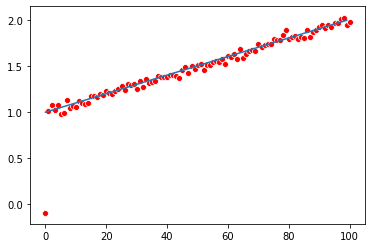

In [203]:
w = LinearRegression_GD(X, Y, 0.001, True)
sns.scatterplot(x=range(m+1), y=w, color='red')
sns.lineplot(x=range(m), y=np.linspace(1,2, m))

In [147]:
R2(X, Y, w)

0.9964996353787386

### 4) Speed test and accuracy between OLS and GD

In [148]:
n = 1000
m = 100
X = np.random.randn(n,m)
Y = X.dot(np.linspace(1, 2, m))+np.random.randn(n)
%timeit LinearRegression(X, Y)
%timeit LinearRegression_GD(X, Y, alpha=0.001)

505 µs ± 58.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
640 µs ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Consider in quant finance, for 3 month we have n = 30 * 3 * 22 * 240 = 475200, m = 1000 features

In [149]:
n = 475200
m = 1000
X = np.random.randn(n,m)
Y = X.dot(np.linspace(1, 2, m))+np.random.randn(n)

#### benhmark Sklearn LR

In [138]:
from sklearn.linear_model import LinearRegression as sklearn_lr
t1 = time.time()
sklearn_lr(fit_intercept=False).fit(X, Y)
print(time.time() - t1)

38.23426103591919


#### simple linear algebra

In [132]:
t1 = time.time()
LinearRegression(X, Y)
print(time.time() - t1)

18.420275926589966


#### Gradient descent

In [150]:
t1 = time.time()
LinearRegression_GD(X, Y, alpha=0.000001, verbose=True)
print(time.time() - t1)

loss: 75.37554345323852
loss: 20.66376775408139
loss: 5.703109663662525
loss: 1.5844471793584889
loss: 0.44302974813973567
loss: 0.12464913328913721
loss: 0.03528162068311095
loss: 0.010043946065418866
loss: 0.0028750477094576146
loss: 0.0008272860963341652
loss: 0.00023923267266998157
loss: 6.950630616295623e-05
loss: 2.0284015504222476e-05
loss: 5.944291282366125e-06
loss: 1.7488690531145978e-06
5.946364164352417


#### Gradient Desent with batches

In [151]:
def LinearRegression_GDB(X, Y, alpha = 0.000001, verbose=False):
    assert X.shape[0] == Y.shape[0]
    m = X.shape[1]
    w1 = np.ones(m)  
    for i in range(100000):
        batch = 10000
        num_of_batch = X.shape[0] // batch +1
        w2 = w1.copy()
        for j in range(num_of_batch):
            idx = np.arange(j * batch, np.minimum((j+1) * batch, X.shape[0]))
            w2 = w2 - alpha * X[idx, :].T.dot(X[idx, :].dot(w1)-Y[idx])  
            if (j % np.maximum(num_of_batch // 5, 1) == 0) & verbose:
                print('{:.0f}%'.format(j/num_of_batch*100),end=' ')
        if verbose:
            print(((w1-w2)**2).sum(), ((w1-np.linspace(1, 2, m))**2).sum())
        if ((w1-w2)**2).sum() < 0.0001:
            return w2
        w1 = w2
    print('Not Converge')
    return w2

In [152]:
t1 = time.time()
LinearRegression_GDB(X, Y, alpha=0.000001, verbose=True)
print(time.time() - t1)

0% 19% 38% 56% 75% 94% 75.37554345323846 333.50016683350015
0% 19% 38% 56% 75% 94% 20.663767754081388 92.10127756596864
0% 19% 38% 56% 75% 94% 5.703109663662535 25.60311022483989
0% 19% 38% 56% 75% 94% 1.5844471793584896 7.1633634190111035
0% 19% 38% 56% 75% 94% 0.4430297481397362 2.0172163862723953
0% 19% 38% 56% 75% 94% 0.12464913328913801 0.5722049828994498
0% 19% 38% 56% 75% 94% 0.03528162068311098 0.1641137399941353
0% 19% 38% 56% 75% 94% 0.010043946065418807 0.048262075475464405
0% 19% 38% 56% 75% 94% 0.0028750477094577776 0.015229741051589389
0% 19% 38% 56% 75% 94% 0.0008272860963341452 0.005783432147164615
0% 19% 38% 56% 75% 94% 0.00023923267266995926 0.0030806593547869653
0% 19% 38% 56% 75% 94% 6.95063061629646e-05 0.002310413870379828
27.19553279876709


This is strange and probably due to the reason that loop in python is much slower and the scale of data is not too large. In general, in Gradient Descent, we need to have time complexity of $O(amn^2)$, and the GD with batches is $O(amn^2/B)$, and the algebra way is $O(m^2n^2)$

## then we go to lasso and ridge

#### Lasso

In general, the ridge is no different from linear regression expect that there is a l2 norm in ridge, which makes the $\frac{dl}{dw} = X^T(Xw-Y) + 2\alpha w $

### Lasso

Lasso is much difficult because its loss function is not differentiable everywhere.

So we need to use Least Angle regression, which is a greedy algo to approach the Y in the columns space of X

Also, we can use coordinate descent, during the iteration of which we fix all the other coordinates and find a local minimum of the left coordinate and do it for all the coordinates.

Here is example of coordinate descend/

In [185]:
n = 470000
m = 1000
X = np.random.randn(n,m)
good_feature = 100
Y = X[:, :good_feature].dot(np.linspace(1, 2, good_feature))+np.random.randn(n)

In [186]:
def LassoRegression(X, Y, alpha = 0.001,learning_rate=0.0001, verbose=False):
    assert X.shape[0] == Y.shape[0]
    m = X.shape[1]
    w1 = np.ones(m)
    for i in range(1000):
        w2 = w1 - learning_rate * ((X.dot(w1) - Y).T.dot(X) + alpha * np.sign(w1))        
        if ((w1-w2)**2).sum() < 0.000001:
            return w2
        if verbose:
            print('loss:', ((w1-w2)**2).sum())
        w1 = w2
    print('Not Converge')
    return w2
# LassoRegression(X, Y, verbose=True)

loss: 206.81814325059213
loss: 57.71999960164434
loss: 16.21440082511578
loss: 4.584462380304746
loss: 1.3045128254510145
loss: 0.37352948417215626
loss: 0.10760895020488036
loss: 0.03118439438197481
loss: 0.009088641118312044
loss: 0.002663283607152655
loss: 0.00078433371128153
loss: 0.0002320149220088407
loss: 6.890784877581472e-05
loss: 2.05464604432242e-05
loss: 6.1524396114296e-06
loss: 1.850770347926732e-06


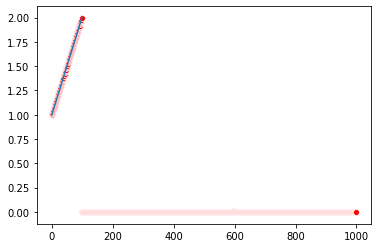

In [196]:
w = LassoRegression(X, Y, learning_rate=0.000001, alpha=1, verbose=True)
sns.scatterplot(x=range(m), y=w, color='red')
sns.lineplot(x=range(good_feature), y=np.linspace(1,2, good_feature))

In [189]:
t1 = time.time()
w = LassoRegression(X, Y, learning_rate=0.000001, alpha=1, verbose=False)
- t1 + time.time()


6.373395204544067

In [194]:
from sklearn.linear_model import Lasso
t1 = time.time()
model = Lasso(fit_intercept=True,alpha=1)
model.fit(X, Y)
- t1 + time.time()



32.35470390319824

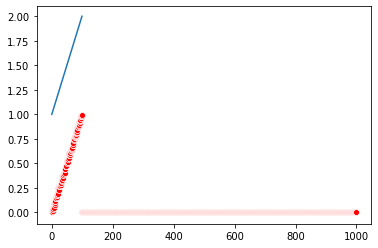

In [195]:
sns.scatterplot(x=range(m), y=model.coef_, color='red')
sns.lineplot(x=range(good_feature), y=np.linspace(1,2, good_feature))